<a href="https://colab.research.google.com/github/ziadbadwy/brainTumorClassification/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
warnings.filterwarnings('ignore')
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import shutil
import glob

import random
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from tensorflow.keras.models import Model


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

from google.colab import files

import warnings



In [2]:
uploaded = files.upload()


KeyboardInterrupt: ignored

In [ ]:
!unzip /content/colabTrain.zip
!unzip /content/colabTest.zip
!unzip /content/colabCV.zip

# New Section

In [56]:
#count images according to classes 
pathTrain="/content/colabTrain/"
pathCV = "/content/colabCV/"
pathTest="/content/colabTest/"

numberOfTrain = {}
numberOfCV = {}
numberOfTest={}

images_train_data={}
images_CV_data={}
images_Test_data={}


pathOfEachTrain=[]
pathOfEachCV=[]
pathOfEachtest=[]

for dir in os.listdir(pathTrain):
  images_train_data[dir]=os.listdir(os.path.join(pathTrain,dir))
  pathOfEachTrain.append(os.path.join(pathTrain,dir))
  numberOfTrain[dir] = len(os.listdir(os.path.join(pathTrain,dir)))
for dir in os.listdir(pathCV):
  images_CV_data[dir]=os.listdir(os.path.join(pathCV,dir))
  pathOfEachCV.append(os.path.join(pathCV,dir))
  numberOfCV[dir] = len(os.listdir(os.path.join(pathCV,dir)))
for dir in os.listdir(pathTest):
  images_Test_data[dir]=os.listdir(os.path.join(pathTest,dir))
  pathOfEachtest.append(os.path.join(pathTest,dir))
  numberOfTest[dir] = len(os.listdir(os.path.join(pathTest,dir)))


In [4]:
label=[]
pathOfEachTrain[0]
numberOfTrain
numberOfCV

{'NoTumor': 51, 'Tumor': 51}

In [57]:
#data augm train
trainGen = ImageDataGenerator(
                             vertical_flip=True,
                             rescale=1/255

                             )
"""
k=[]
k = list(images_train_data.keys())
for i in range(len(k)):
  for j in images_train_data[k[i]]:
    img = load_img(os.path.join(pathTrain,k[i],j))
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    count=0
    for batch in trainGen.flow(x,save_to_dir=pathTrain+k[i],save_prefix=f'{k[i]}',save_format='jpg'):
      count+=1
      if count==2:
        break;


"""





"\nk=[]\nk = list(images_train_data.keys())\nfor i in range(len(k)):\n  for j in images_train_data[k[i]]:\n    img = load_img(os.path.join(pathTrain,k[i],j))\n    x=img_to_array(img)\n    x=x.reshape((1,)+x.shape)\n    count=0\n    for batch in trainGen.flow(x,save_to_dir=pathTrain+k[i],save_prefix=f'{k[i]}',save_format='jpg'):\n      count+=1\n      if count==2:\n        break;\n\n\n"

In [58]:

Train_prepare = trainGen.flow_from_directory(directory = pathTrain,target_size=(224,224),batch_size=32,class_mode='binary')
image1=cv2.imread(Train_prepare.filepaths[100])
image2=cv2.imread(Train_prepare.filepaths[1000])

Found 1001 images belonging to 2 classes.


Found 98 images belonging to 2 classes.


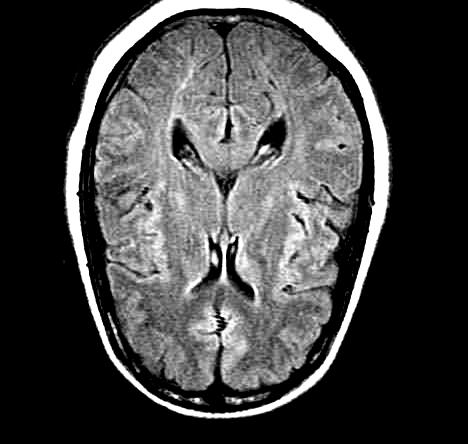

In [59]:
#data augm train

"""
trainGen = ImageDataGenerator(
                             horizontal_flip=True,
                             rescale=1/255

                              )
k=[]
k = list(images_Test_data.keys())
for i in range(len(k)):
  for j in images_Test_data[k[i]]:
    img = load_img(os.path.join(pathTest,k[i],j))
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    count=0
    for batch in trainGen.flow(x,save_to_dir=pathTest+k[i],save_prefix=f'{k[i]}',save_format='jpg'):
      count+=1
      if count==6:
        break;
#data augm test
"""
datagen = ImageDataGenerator(
                             rescale=1/255
                             )
test_prepare = datagen.flow_from_directory(directory = pathTest,target_size=(224,224),batch_size=7,class_mode='binary')
test_prepare

image1=cv2.imread(test_prepare.filepaths[5])
cv2_imshow( image1)

Found 102 images belonging to 2 classes.


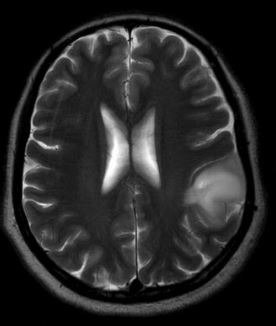

In [60]:
#data augm CV
"""
trainGen = ImageDataGenerator(
                             horizontal_flip=True,
                             rescale=1/255

                              )
k=[]
k = list(images_CV_data.keys())
for i in range(len(k)):
  for j in images_CV_data[k[i]]:
    img = load_img(os.path.join(pathCV,k[i],j))
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    count=0
    for batch in trainGen.flow(x,save_to_dir=pathCV+k[i],save_prefix=f'{k[i]}',save_format='jpg'):
      count+=1
      if count==6:
        break;
"""
CV_prepare = datagen.flow_from_directory(directory = pathCV,target_size=(224,224),batch_size=6,class_mode='binary')
CV_prepare

image1=cv2.imread(CV_prepare.filepaths[5])
cv2_imshow( image1)


In [ ]:
dec_list = tf.test.gpu_device_name()


In [ ]:
dec_list

In [61]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=6,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="mymodel.h5",save_best_only=True,verbose=1,mode='auto') 
cd=[es,mc] 


In [62]:
#build model
model =  Sequential(
    [
        Conv2D(filters = 16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
        Conv2D(filters = 36,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters = 64,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters = 128,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(rate=0.25),
        Flatten(),
        




     
        Dense(64, activation="relu"),
        Dropout(rate=0.25),
        Dense(1 , activation= 'sigmoid')
    ], name="Complex"
)


In [11]:
model.summary()

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7385

In [63]:
model.compile(
    loss=binary_crossentropy,
    metrics=['accuracy'],
    optimizer=Adam(0.001)
)

In [ ]:
#shutil.rmtree('/content/colabTest')	

In [13]:
final=model.fit_generator(generator=Train_prepare
                          ,steps_per_epoch=8
                          ,epochs=50
                          ,verbose=1
                          ,validation_data=CV_prepare
                          ,validation_steps=16
                          ,callbacks=cd)

Epoch 1/50


<ipython-input-13-4e6400774d89>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  final=model.fit_generator(generator=Train_prepare


8/8 [==============================] - ETA: 0s - loss: 1.0399 - accuracy: 0.5469
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to mymodel.h5
8/8 [==============================] - 33s 4s/step - loss: 1.0399 - accuracy: 0.5469 - val_loss: 0.6413 - val_accuracy: 0.6875
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 0.6199 - accuracy: 0.6719
Epoch 2: val_accuracy did not improve from 0.68750
8/8 [==============================] - 36s 5s/step - loss: 0.6199 - accuracy: 0.6719 - val_loss: 0.6184 - val_accuracy: 0.5729
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.8125
Epoch 3: val_accuracy improved from 0.68750 to 0.71875, saving model to mymodel.h5
8/8 [==============================] - 32s 4s/step - loss: 0.4911 - accuracy: 0.8125 - val_loss: 0.5796 - val_accuracy: 0.7188
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 0.3835 - accuracy: 0.8672
Epoch 4: val_accuracy did not improve from 0.718

In [17]:
f=final.history
print(f.keys())
print(max(f['accuracy']))
print(max(f['val_accuracy']))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.96875
0.875


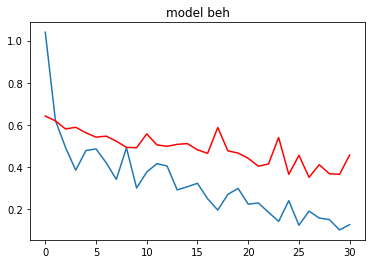

In [18]:
plt.plot(f['loss'])
plt.plot(f['val_loss'],c="red")
plt.title("model beh")
plt.show()


In [19]:
from keras.models import load_model
model = load_model("/content/mymodel.h5")

In [20]:
#acc
acc=model.evaluate_generator(test_prepare)[1]
print(f"the accuracy is {acc*100} %")

<ipython-input-20-7e9fa94351c4>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_prepare)[1]


the accuracy is 90.81632494926453 %


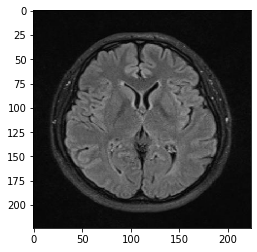

1/1 [==============================] - 0s 146ms/step
dosent have cancer


In [21]:
path = "/content/colabTest/NoTumor/no563.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0][0]
if pred>0.5:
  print("have a cancer")
else:
  print("dosent have cancer")


1/1 [==============================] - 0s 62ms/step
dosent have cancer
1/1 [==============================] - 0s 64ms/step
dosent have cancer
1/1 [==============================] - 0s 58ms/step
have cancer
1/1 [==============================] - 0s 67ms/step
dosent have cancer
1/1 [==============================] - 0s 67ms/step
dosent have cancer
1/1 [==============================] - 0s 57ms/step
dosent have cancer
1/1 [==============================] - 0s 60ms/step
dosent have cancer
1/1 [==============================] - 0s 69ms/step
dosent have cancer
1/1 [==============================] - 0s 60ms/step
dosent have cancer
1/1 [==============================] - 0s 61ms/step
dosent have cancer
1/1 [==============================] - 0s 70ms/step
dosent have cancer
1/1 [==============================] - 0s 72ms/step
dosent have cancer
1/1 [==============================] - 0s 62ms/step
dosent have cancer
1/1 [==============================] - 0s 63ms/step
dosent have cancer
1/1 [========

KeyboardInterrupt: ignored

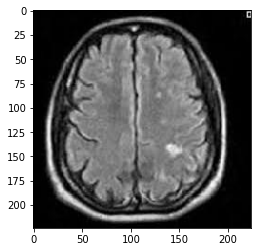

In [22]:
err1=0
err2=0
for i in range (len(CV_prepare.filepaths)):
  path = Train_prepare.filepaths[i]
  img = load_img(path,target_size=(224,224))
  input_arr = img_to_array(img)/255
  plt.imshow(input_arr)

  input_arr=np.expand_dims(input_arr,axis=0)
  pred=model.predict(input_arr)[0][0]
  plt.show
  if pred > 0.5:
    print("have cancer")
    err1+=1
  else:
    print("dosent have cancer")
    err2+=1

print(err1)
print(err2)
print(numberOfCV)

In [ ]:
#shutil.rmtree('/content/colabTrain/')

In [ ]:
#@title VGG 16


In [68]:
MN = MobileNet(input_shape=(224,224,3),include_top=False)

In [69]:
MN.output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [70]:
for layer in MN.layers:
    layer.trainable = False

In [71]:
Out = Flatten()(MN.output)
Out = Dense(1,activation='sigmoid')(Out)

In [72]:

model = Model(inputs = MN.input,outputs=Out)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [73]:
trainGen = ImageDataGenerator(preprocessing_function=preprocess_input )
Train_prepare = trainGen.flow_from_directory(directory = pathTrain,target_size=(224,224),batch_size=32,class_mode='binary')
image1=cv2.imread(Train_prepare.filepaths[100])
image2=cv2.imread(Train_prepare.filepaths[1000])

Found 1001 images belonging to 2 classes.


In [74]:
model.compile(
    loss=binary_crossentropy,
    metrics=['accuracy'],
    optimizer=Adam(0.001)
)
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="BrainTumor.h5",save_best_only=True,verbose=1,mode='auto') 
cd=[es,mc] 


In [75]:
final=model.fit_generator(generator=Train_prepare
                          ,steps_per_epoch=10
                          ,epochs=30
                          ,verbose=1
                          ,validation_data=CV_prepare
                          ,validation_steps=16
                          ,callbacks=cd)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.1943 - accuracy: 0.7750
Epoch 1: val_accuracy improved from -inf to 0.92708, saving model to BrainTumor.h5
10/10 [==============================] - 17s 2s/step - loss: 1.1943 - accuracy: 0.7750 - val_loss: 0.2169 - val_accuracy: 0.9271
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.9394
Epoch 2: val_accuracy improved from 0.92708 to 0.95833, saving model to BrainTumor.h5
10/10 [==============================] - 16s 2s/step - loss: 0.4084 - accuracy: 0.9394 - val_loss: 0.1662 - val_accuracy: 0.9583
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.9344
Epoch 3: val_accuracy did not improve from 0.95833
10/10 [==============================] - 18s 2s/step - loss: 0.5365 - accuracy: 0.9344 - val_loss: 0.1550 - val_accuracy: 0.9583
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9594
Epoch 4: val_accu

In [76]:
f=final.history
print(f.keys())
print(max(f['accuracy']))
print(max(f['val_accuracy']))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
1.0
0.9895833134651184


In [77]:
model = load_model("/content/BrainTumor.h5")

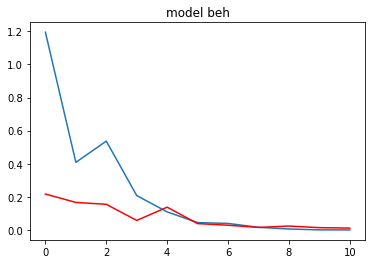

In [78]:
plt.plot(f['loss'])
plt.plot(f['val_loss'],c="red")
plt.title("model beh")
plt.show()


In [79]:
#acc
acc=model.evaluate_generator(test_prepare)[1]
print(f"the accuracy is {acc*100} %")

the accuracy is 95.91836929321289 %


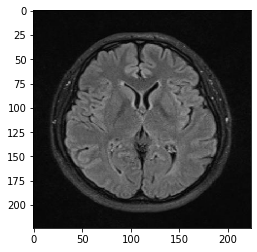

1/1 [==============================] - 0s 397ms/step
dosent have cancer


In [80]:
path = "/content/colabTest/NoTumor/no563.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0][0]
if pred>0.5:
  print("have a cancer")
else:
  print("dosent have cancer")
